In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1]:
## Load Dataset
import pandas as pd

# Define the path to your data file
data_file = "fake_job_postings.xlsx" 
# Load the dataset using the specified file path
df = pd.read_excel(data_file)

# Display the first few rows of the dataframe to understand its structure
df.head()

,Ground_Truth,job_id,title,company_profile,description,requirements,benefits,has_company_logo,has_questions
0,0,1,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,1,0
1,0,2,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,1,0
2,0,3,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,1,0
3,0,4,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,1,0
4,0,5,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,1


In [2]:
# Ensure 'Ground_Truth' column is mapped to the target variable 'y'
y = df['Ground_Truth'].to_numpy()

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, coo_matrix
import numpy as np

# Fill missing values for textual columns
df['company_profile'].fillna('Not Available', inplace=True)
df['description'].fillna('Not Available', inplace=True)
df['requirements'].fillna('Not Available', inplace=True)
df['benefits'].fillna('Not Available', inplace=True)

# Combine textual columns
df['combined_text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

# Initialize and apply TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text_features = tfidf_vectorizer.fit_transform(df['combined_text'])

# Convert binary columns to numpy array and then to a sparse matrix
X_binary = df[['has_company_logo', 'has_questions']].values
X_binary_sparse = coo_matrix(X_binary)

# Combine TF-IDF features with binary features
X_combined = hstack([X_text_features, X_binary_sparse])

# Define the target variable
y = df['Ground_Truth'].values

# Shapes of combined features and target variable
X_combined.shape, y.shape

C:\Users\kusum\AppData\Local\Temp\ipykernel_27088\2769456308.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company_profile'].fillna('Not Available', inplace=True)
C:\Users\kusum\AppData\Local\Temp\ipykernel_27088\2769456308.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

((17880, 5002), (17880,))

C:\Users\kusum\AppData\Local\Temp\ipykernel_27088\757992086.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ground_Truth', data=df, palette='coolwarm')


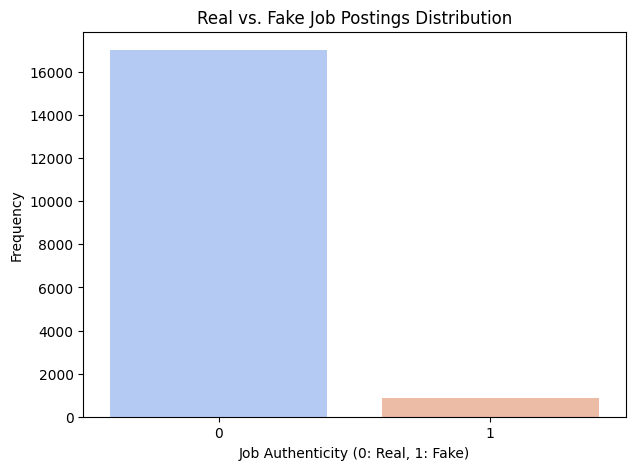

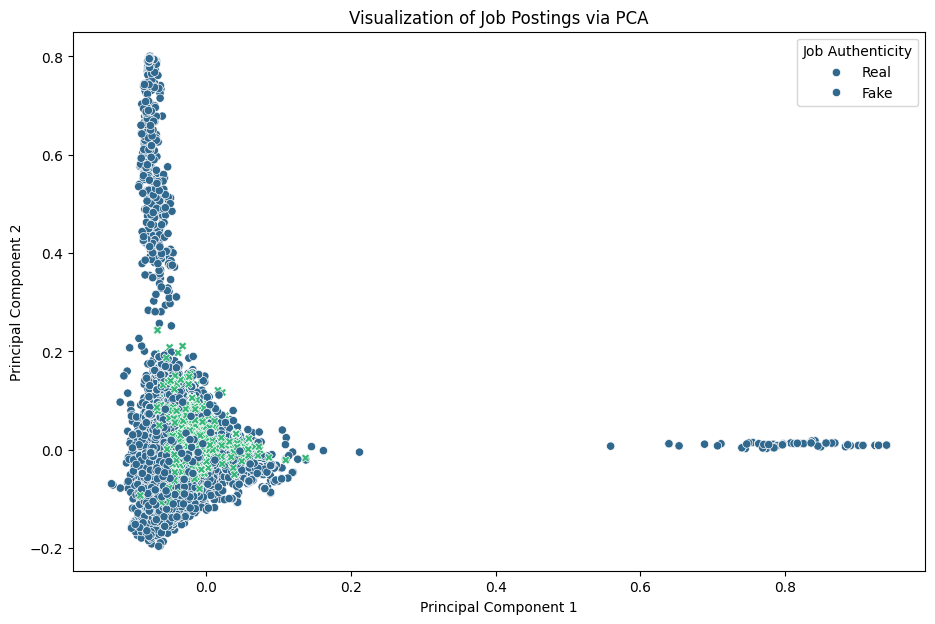

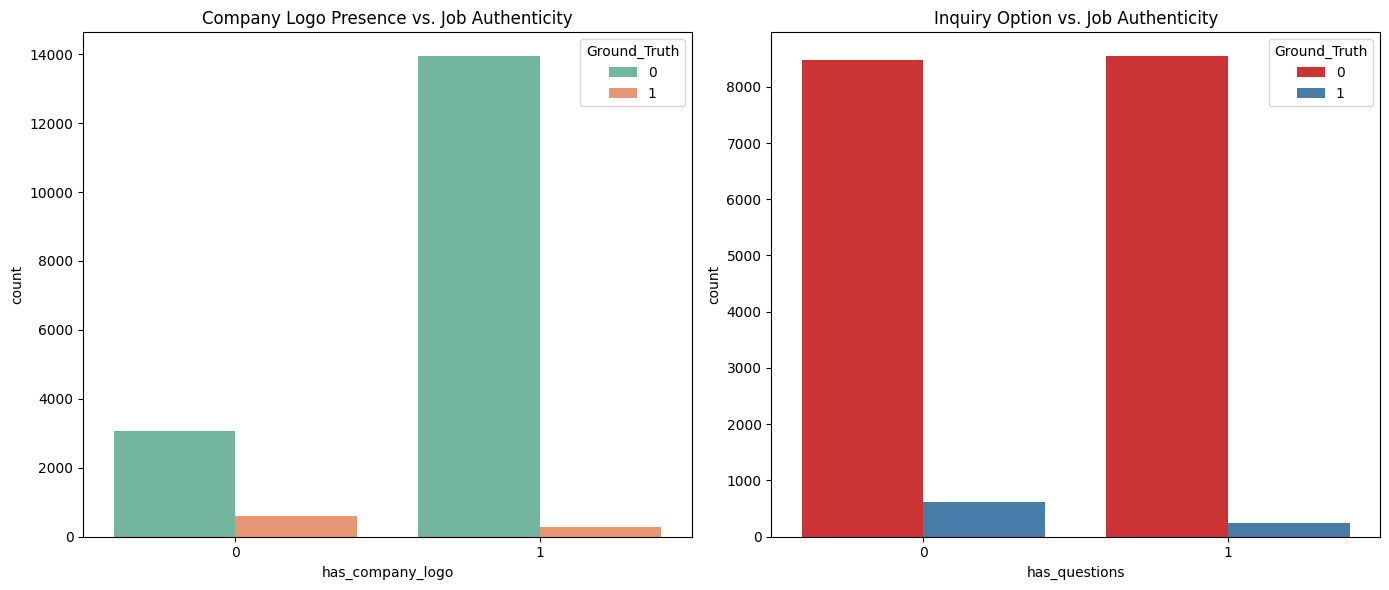

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Visualize the balance of real vs. fake job postings
plt.figure(figsize=(7, 5))
sns.countplot(x='Ground_Truth', data=df, palette='coolwarm')
plt.title('Real vs. Fake Job Postings Distribution')
plt.xlabel('Job Authenticity (0: Real, 1: Fake)')
plt.ylabel('Frequency')
plt.show()

# Applying PCA to the TF-IDF features for visualization
pca_model = PCA(n_components=2) # Reducing to 2 dimensions for visualization
X_reduced_pca = pca_model.fit_transform(X_text_features.toarray()) # Convert sparse matrix to dense

# Visualizing the PCA-reduced TF-IDF features
plt.figure(figsize=(11, 7))
sns.scatterplot(x=X_reduced_pca[:, 0], y=X_reduced_pca[:, 1], hue=df['Ground_Truth'], style=df['Ground_Truth'], palette='viridis')
plt.title('Visualization of Job Postings via PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Job Authenticity', labels=['Real', 'Fake'])
plt.show()

# Analyzing Binary Features with adjusted colors
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='has_company_logo', hue='Ground_Truth', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Company Logo Presence vs. Job Authenticity')
sns.countplot(x='has_questions', hue='Ground_Truth', data=df, ax=axes[1], palette='Set1')
axes[1].set_title('Inquiry Option vs. Job Authenticity')
plt.tight_layout()
plt.show()


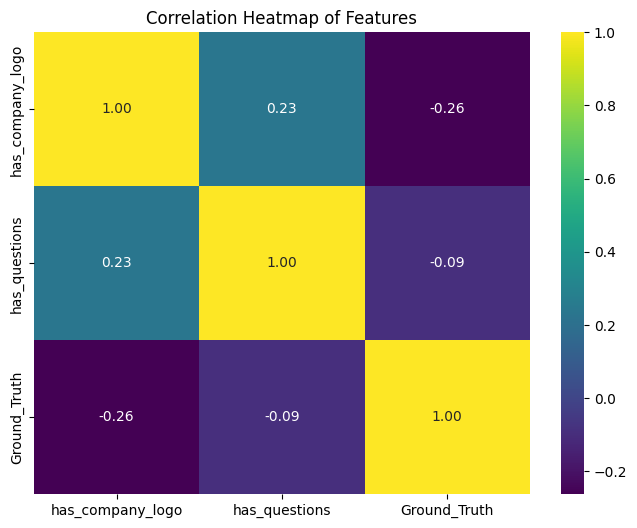

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure columns are numeric
df['has_company_logo'] = pd.to_numeric(df['has_company_logo'], errors='coerce')
df['has_questions'] = pd.to_numeric(df['has_questions'], errors='coerce')
df['Ground_Truth'] = pd.to_numeric(df['Ground_Truth'], errors='coerce')

# Calculate the correlation matrix for specified columns
correlation_matrix = df[['has_company_logo', 'has_questions', 'Ground_Truth']].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', cbar=True)
plt.title('Correlation Heatmap of Features')
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Feature Engineering
df['description_length'] = df['description'].apply(len)
df['requirements_length'] = df['requirements'].apply(len)
df['benefits_length'] = df['benefits'].apply(len)
df['interaction_logo_questions'] = df['has_company_logo'] * df['has_questions']

# Address class imbalance with stratified split
X = df[['has_company_logo', 'has_questions', 'description_length', 'requirements_length', 'benefits_length', 'interaction_logo_questions']]
y = df['Ground_Truth']

# Stratified split to maintain class balance in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train and X_test are defined and contain the original unscaled length features
# Assuming length_features is a list containing the column names of length features

# Define length_features as a list containing the names of the columns representing the length features
length_features = ['description_length', 'requirements_length', 'benefits_length']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the length features - ensure the input is float
X_train_scaled = scaler.fit_transform(X_train[length_features].astype(float))
X_test_scaled = scaler.transform(X_test[length_features].astype(float))

# Convert scaled values to float64 to ensure compatibility with the original DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled.astype(float), columns=length_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled.astype(float), columns=length_features)

# Update the original DataFrames with the scaled values
X_train.update(X_train_scaled_df)
X_test.update(X_test_scaled_df)

C:\Users\kusum\AppData\Local\Temp\ipykernel_27088\664613159.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.13900000e+03 -2.39092570e-01  1.64221489e+00 ...  1.31785153e+00
  1.40022953e+00 -1.14833969e+00]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.update(X_train_scaled_df)
C:\Users\kusum\AppData\Local\Temp\ipykernel_27088\664613159.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 6.42000000e+02 -1.50429137e-01 -9.53023141e-01 ... -9.38489245e-01
 -1.98875455e-01 -7.28555200e-01]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.update(X_train_scaled_df)
C:\Users\kusum\AppData\Local\Temp\ipykernel_27088\664613159.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas

In [11]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Reduce parameter grid size
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Sample data if necessary
# X_train_sampled, _, y_train_sampled, _ = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)

# Instantiate StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the GridSearchCV with StratifiedKFold
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rf_params = rf_grid_search.best_params_
best_rf_classifier = rf_grid_search.best_estimator_

# Make predictions on test set
best_rf_classifier_predictions = best_rf_classifier.predict(X_test)

# Calculate accuracy score and print results
accuracy = accuracy_score(y_test, best_rf_classifier_predictions)
print("Accuracy Score:", accuracy)

# Generate and print classification report
class_report = classification_report(y_test, best_rf_classifier_predictions)
print("Classification Report:")
print(class_report)



Accuracy Score: 0.9530201342281879
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3403
           1       0.52      0.35      0.42       173

    accuracy                           0.95      3576
   macro avg       0.74      0.67      0.70      3576
weighted avg       0.95      0.95      0.95      3576



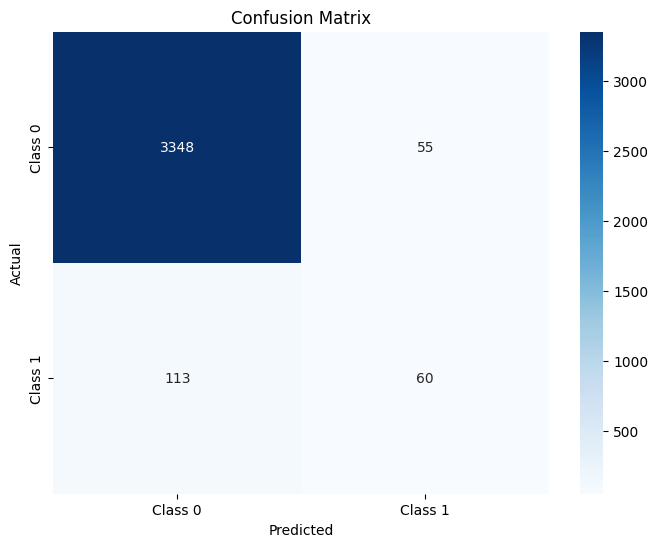

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, best_rf_classifier_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define a simplified parameter grid for Decision Tree Classifier
dt_param_dist = {
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Reduce the number of iterations for random search
n_iter_search = 5  # Adjust as needed based on computational resources and desired exploration

# Instantiate RandomizedSearchCV with simplified parameters
dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=dt_param_dist, n_iter=n_iter_search, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
dt_random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_dt_params = dt_random_search.best_params_
best_dt_classifier = dt_random_search.best_estimator_

# Make predictions on the test set
best_dt_classifier_predictions = best_dt_classifier.predict(X_test)

# Calculate accuracy score and print results
accuracy = accuracy_score(y_test, best_dt_classifier_predictions)
print("Accuracy Score:", accuracy)

# Generate and print classification report
class_report = classification_report(y_test, best_dt_classifier_predictions)
print("Classification Report:")
print(class_report)


Accuracy Score: 0.9328859060402684
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3403
           1       0.27      0.22      0.24       173

    accuracy                           0.93      3576
   macro avg       0.61      0.59      0.60      3576
weighted avg       0.93      0.93      0.93      3576



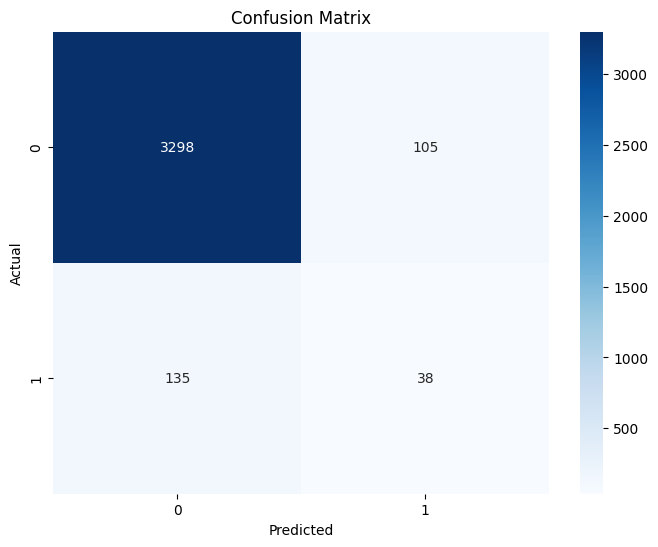

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, best_dt_classifier_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
